# Plotting Weather Patterns

An NOAA dataset has been stored in the file `fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

Tasks:

1. Write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

The data corresponds to **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('C:/Users/ecabe/Desktop/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

Import data and create the metdata dataframe. Date data is transformed to datetime format and Feb-29 is filtered out of the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
%matplotlib notebook
metdata=pd.read_csv('C:/Users/ecabe/Desktop/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
metdata['Date']=pd.to_datetime(metdata['Date'])
metdata=metdata.loc[~((metdata.Date.dt.month == 2) & (metdata.Date.dt.day == 29))]

#metdata['Day']=metdata.Date.dt.day
#metdata['Month']=metdata.Date.dt.month
#metdata['Year']=metdata.Date.dt.year
metdata=metdata.drop(['ID','Element'], axis=1)

Reduce the data finding the record high and low for each day. Data_value is dropped from the set.

In [3]:
metdata['maxT_day']=metdata.groupby(metdata['Date'])['Data_Value'].transform(max)
metdata['minT_day']=metdata.groupby(metdata['Date'])['Data_Value'].transform(min)
metdata=metdata.drop(['Data_Value'], axis=1)
metdata.drop_duplicates(subset="Date", keep='first', inplace=True)
metdata['maxT_day']=metdata['maxT_day']/10
metdata['minT_day']=metdata['minT_day']/10

In [8]:
metdata=metdata.sort_values('Date')
metdata['Year']=metdata.Date.dt.year
metdata=metdata.set_index(['Year'])

Filter out year 2015

In [10]:
metdata1=metdata[metdata.index<2015]
metdata1=metdata1.sort_values('Date')
metdata1['Day']=metdata1.Date.dt.day
metdata1['Month']=metdata1.Date.dt.month
metdata1.reset_index(drop=True,inplace=True)
metdata2=metdata[metdata.index==2015]
metdata2=metdata2.sort_values('Date')
#metdata2.reset_index(drop=True,inplace=True)
metdata2['Day']=metdata2.Date.dt.day
metdata2['Month']=metdata2.Date.dt.month

Next step is to find the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. Each row of the 2015 dataframe is compared with every row of the full set in order to find record high temperatures for 2015 greater than the 2005-2014 year span. Similar procedure to find record low T°. Date in wich each record was broken is appended to keep a comparable time base in order to overlay plots.

In [11]:
maxT2015=[]
minT2015=[]
datemax=[]
datemin=[]

#max_2015=pd.DataFrame({'Date':metdata1['Date'], 'maxT_day':metdata1['maxT_day']})
#min_2015=pd.DataFrame({'Date':metdata1['Date'], 'minT_day':metdata1['minT_day']})
#max_2015.reset_index(drop=True,inplace=True)
#min_2015.reset_index(drop=True,inplace=True)
#max_2015['Day']=max_2015.Date.dt.day
#max_2015['Month']=max_2015.Date.dt.month
#min_2015['Day']=min_2015.Date.dt.day
#min_2015['Month']=min_2015.Date.dt.month

for index,rowa in metdata2.iterrows(): 
    for i,rowb in metdata1.iterrows():
        if rowb['maxT_day'] < rowa['maxT_day'] and (rowa['Month'],rowa['Day']) == (rowb['Month'],rowb['Day']):
            maxT2015.append(rowa['maxT_day'])
            datemax.append(rowb['Date'])
        elif rowb['minT_day'] > rowa['minT_day'] and (rowa['Month'],rowa['Day']) == (rowb['Month'],rowb['Day']):
            minT2015.append(rowa['minT_day'])
            datemin.append(rowb['Date'])
            
#max_2015['maxT2015'] =maxT2015
#min_2015['minT2015'] =minT2015
#ap_datamin['minT2015'] =minT2015
#ap_datamax=metdata1.merge(ap_datamax, on='Date', how='left')  
#ap_datamin=metdata1.merge(ap_datamin, on='Date', how='left') 

   

Plot will show record max and min temperatures for years 2005 through 2014 plus an overlay scatter plot for record high or low temperatures broken in 2015. 

<IPython.core.display.Javascript object>


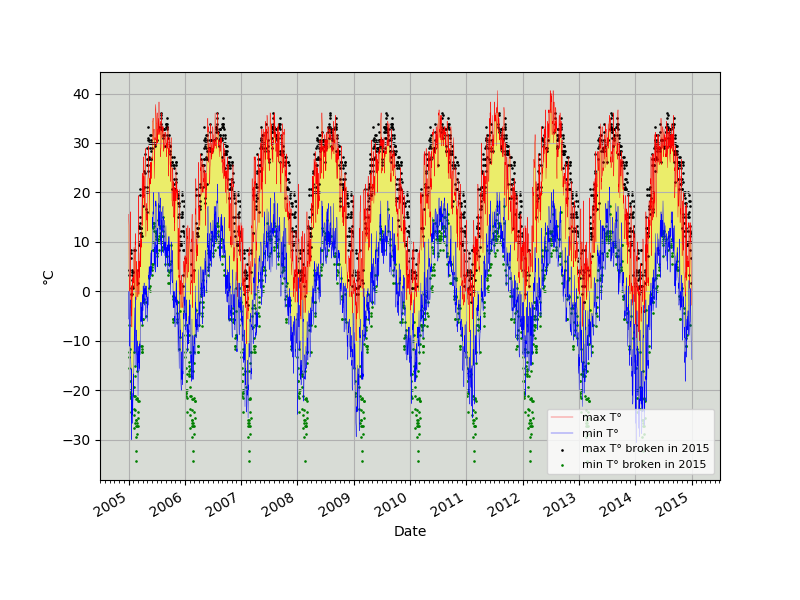

In [12]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(8.0,6.0))
l1, =ax.plot(metdata1['Date'], metdata1['maxT_day'],'r', linewidth=0.3)
l2, =ax.plot(metdata1['Date'], metdata1['minT_day'],'b',linewidth=0.3)
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
def temp(x):
    return '°C%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = temp
ax.grid(True)
ax.set_facecolor('xkcd:light grey')
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

ax.fill_between(metdata1['Date'].values, 
                       metdata1['maxT_day'], metdata1['minT_day'], 
                       facecolor='yellow', 
                       alpha=0.5)
sct1=plt.scatter(datemax,maxT2015,s=0.8,color='k')
sct2=plt.scatter(datemin,minT2015,s=0.8,color='g')

plt.xlabel('Date')
plt.ylabel('°C')
plt.legend([l1,l2,sct1,sct2] ,['max T°', 'min T°','max T° broken in 2015','min T° broken in 2015']
           ,fontsize=8,loc=4, bbox_to_anchor=(1, 0))


plt.show()
#fig.savefig('plot.png',dpi=300)
